In [1]:
# Imports
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML

# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib.pyplot as plt
import seaborn as sns

#Data Prepocessing
import nltk
import random
import copy


/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_729/3901831784.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
df = pd.read_csv('data.csv', low_memory=False)

In [3]:
df = df.assign(AverageSalary = lambda row: (row.LowestSalary + row.HighestSalary)/2)

##Hint replace(to_replace=r'&.*', value='', regex=True)

df["Id"] = df["Id"].replace(to_replace=r'&.*', value='', regex=True)
#Your code to clean date
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
#df.dtypes
# Set column "Id" to type int64
df["Id"] = df["Id"].astype(np.int64)

# Set column "Date" to type datetime64[ns]
df["Date"] = pd.to_datetime(df.Date)
# Data types after data cleaning and conversions
df.dtypes

#Save the cleaned and preprocessed dataset
df.to_csv("preprocessed_data.csv")

df = pd.read_csv('preprocessed_data.csv', low_memory=False)

In [4]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

In [5]:
df = df.assign(AverageSalary = lambda row: (row.LowestSalary + row.HighestSalary)/2)

#### 2) Study Market By Location

In [6]:
df_locations = df.groupby('Location').count()
df_locations['Location'] = df_locations.index
df_locations['Count'] = df_locations["Id"]
df_locations['Not Specified'] = df[~df['Location'].isnull()].count()
df_locations.sort_values("Count",ascending=False,inplace=True)
df_locations

top_5_loc_array = df_locations.iloc[:5,13]
top_5_loc_array = df_locations.iloc[:5,13].values # Obtain cities with the hihest no of job posts
top_5_loc_array

array([60765, 46690, 21466, 13198,  6653])

In [7]:
locationDf = df[df['Location'].isin(top_5_loc_array)]
locationDf.reset_index(inplace=True)
locationDf.head(15)

,index,Unnamed: 0,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary


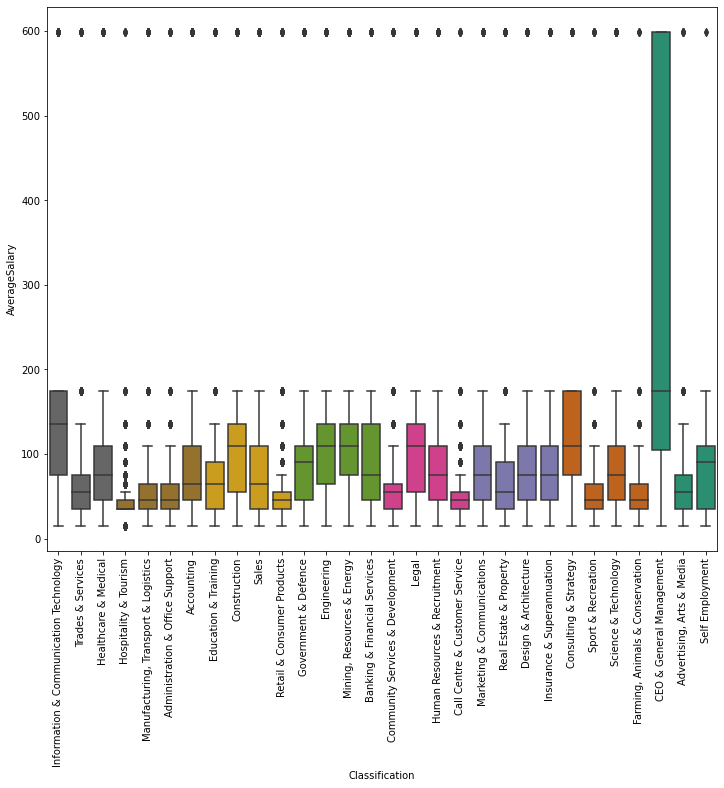

In [8]:
# salaryDf = df[df['Location'].isna()==False]
# salaryDf = salaryDf[salaryDf['Classification'].isna()==False]
# salaryDf = salaryDf[salaryDf['SubClassification'].isna()==False]
# salaryDf = salaryDf[salaryDf['LowestSalary'].isna()==False]
# salaryDf = salaryDf.sort_values(by=["LowestSalary"], ascending =False)

# salaryDf_group = salaryDf.groupby('LowestSalary')
# salaryDf_group_Stats = salaryDf_group.count()
# salaryDf_group_Stats['Count'] = salaryDf_group_Stats['Id']
# # salaryDf_group_Stats['Count']

salaryDf = df[df['Classification'].isna()==False]
salaryDf = salaryDf.groupby('LowestSalary').count()
# salaryDf['Classification'] = ClassificationDf.index
salaryDf['Count'] = salaryDf["Id"]
salaryDf
salaryDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
ClassificationDf = df[df['Classification'].isna()==False]
ClassificationDf = ClassificationDf.groupby('Classification').count()
ClassificationDf['Classification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

sns.boxplot(
    data = df,
    x="Classification",
    y="AverageSalary",
    order=ClassificationDf['Classification'],
    #order=ClassificationDf['Classification'],
    palette=sns.color_palette("Dark2_r",n_colors=30)
)
plt.show()

# sns.barplot(
#     data=salaryDf,
#     x="Count",
#     y="Classification",
#     color="blue",
#     palette=sns.color_palette("magma",n_colors=30)
# )

# plt.title("Number of Postings by Job Sector")
# plt.show()

### Analyse Salaries by Subsectors and location

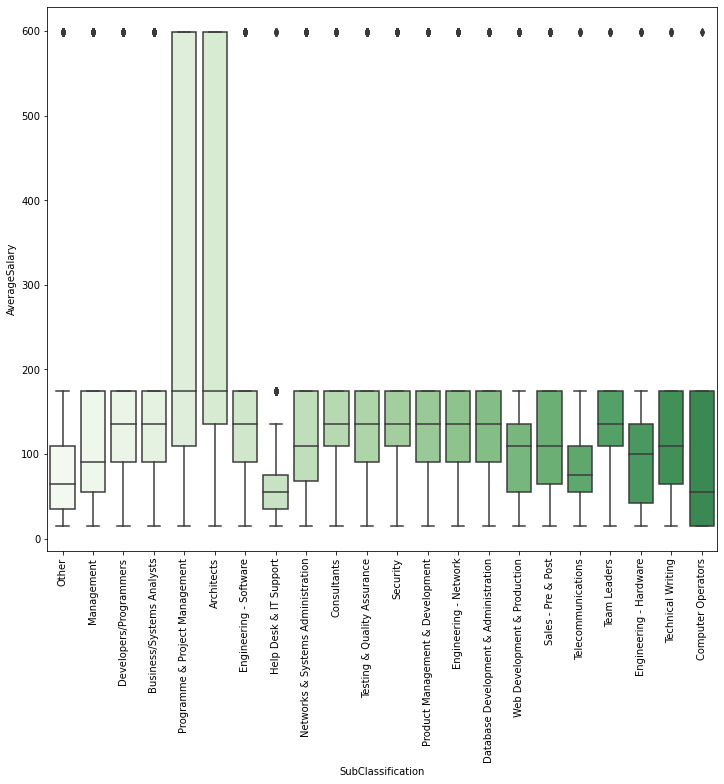

In [9]:
#Information & Communication Technology 

ictSubClasstn = df[df['Classification'] == "Information & Communication Technology"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

sns.boxplot(
    data = df,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    palette=sns.color_palette("Greens",n_colors=30)
)
plt.show()

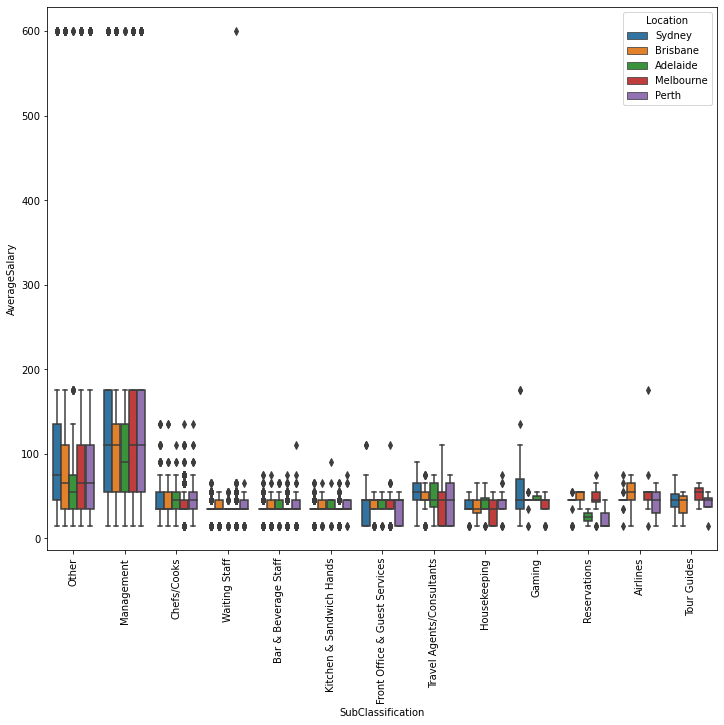

In [10]:
# Information & Communication Technology

ictSubClasstn = df[df['Classification'] == "Hospitality & Tourism"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

df_x = df[df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'])]

sns.boxplot(
    data = df_x,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    #palette=sns.color_palette("Greens",n_colors=30),
    hue="Location"
)

plt.show()
#sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist,kind="box",hue="Location",height=10, aspect=4) 

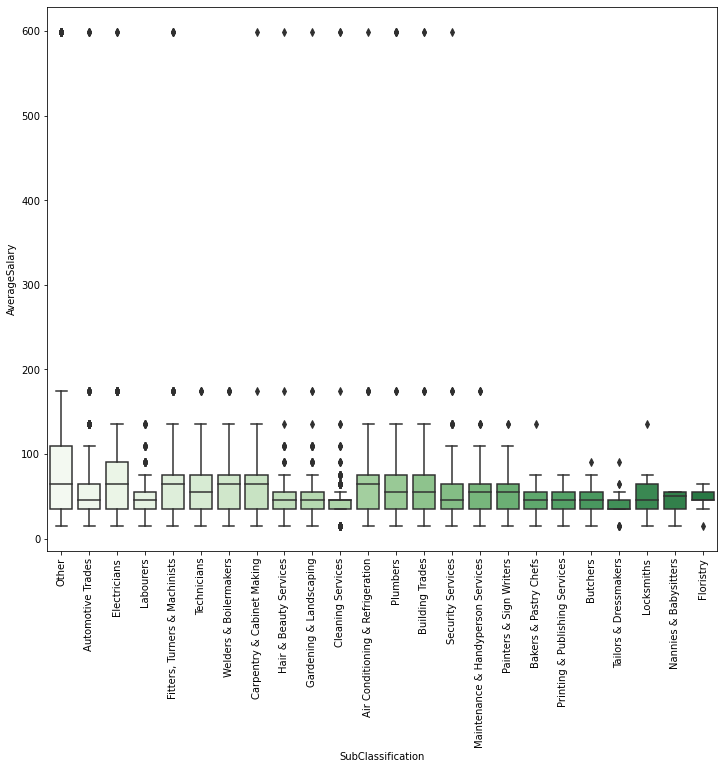

In [11]:
#Trades & Services 

ictSubClasstn = df[df['Classification'] == "Trades & Services"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

sns.boxplot(
    data = df,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    palette=sns.color_palette("Greens",n_colors=30)
)
plt.show()

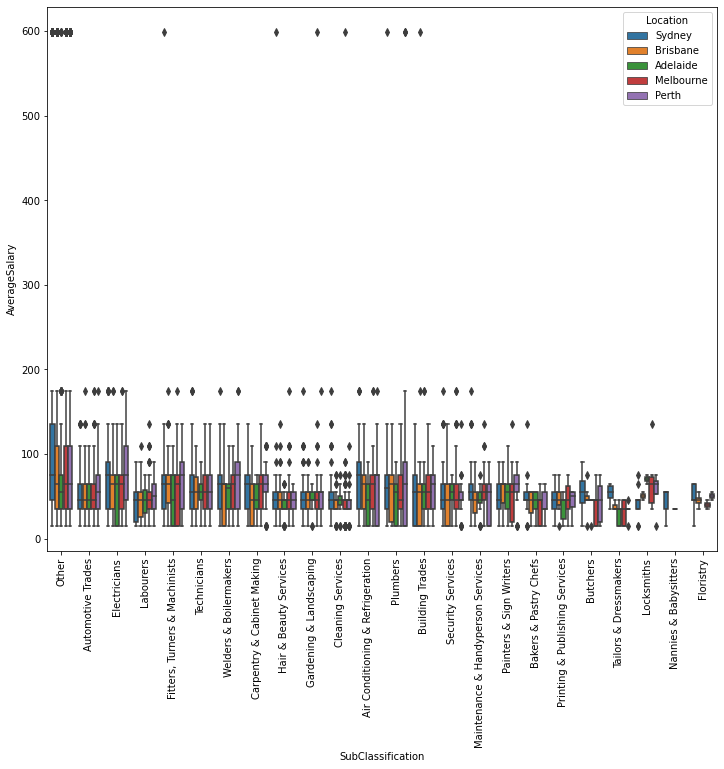

In [12]:
# Trades & Services by Location

ictSubClasstn = df[df['Classification'] == "Trades & Services"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

df_x = df[df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'])]

sns.boxplot(
    data = df_x,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    #palette=sns.color_palette("Greens",n_colors=30),
    hue="Location"
)

plt.show()
#sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist,kind="box",hue="Location",height=10, aspect=4)

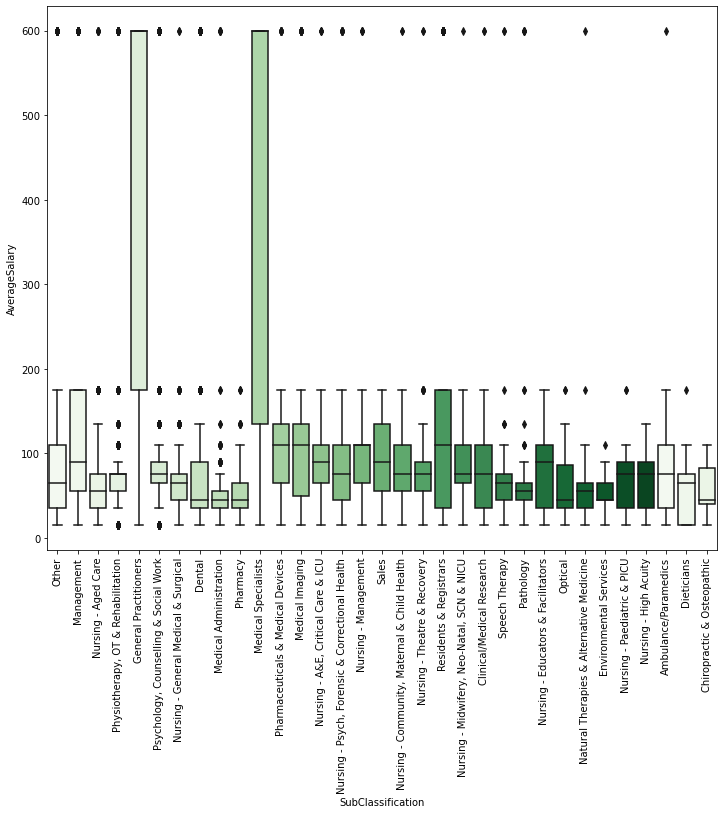

In [13]:
#Healthcare & Medical 

ictSubClasstn = df[df['Classification'] == "Healthcare & Medical"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

sns.boxplot(
    data = df,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    palette=sns.color_palette("Greens",n_colors=30)
)
plt.show()

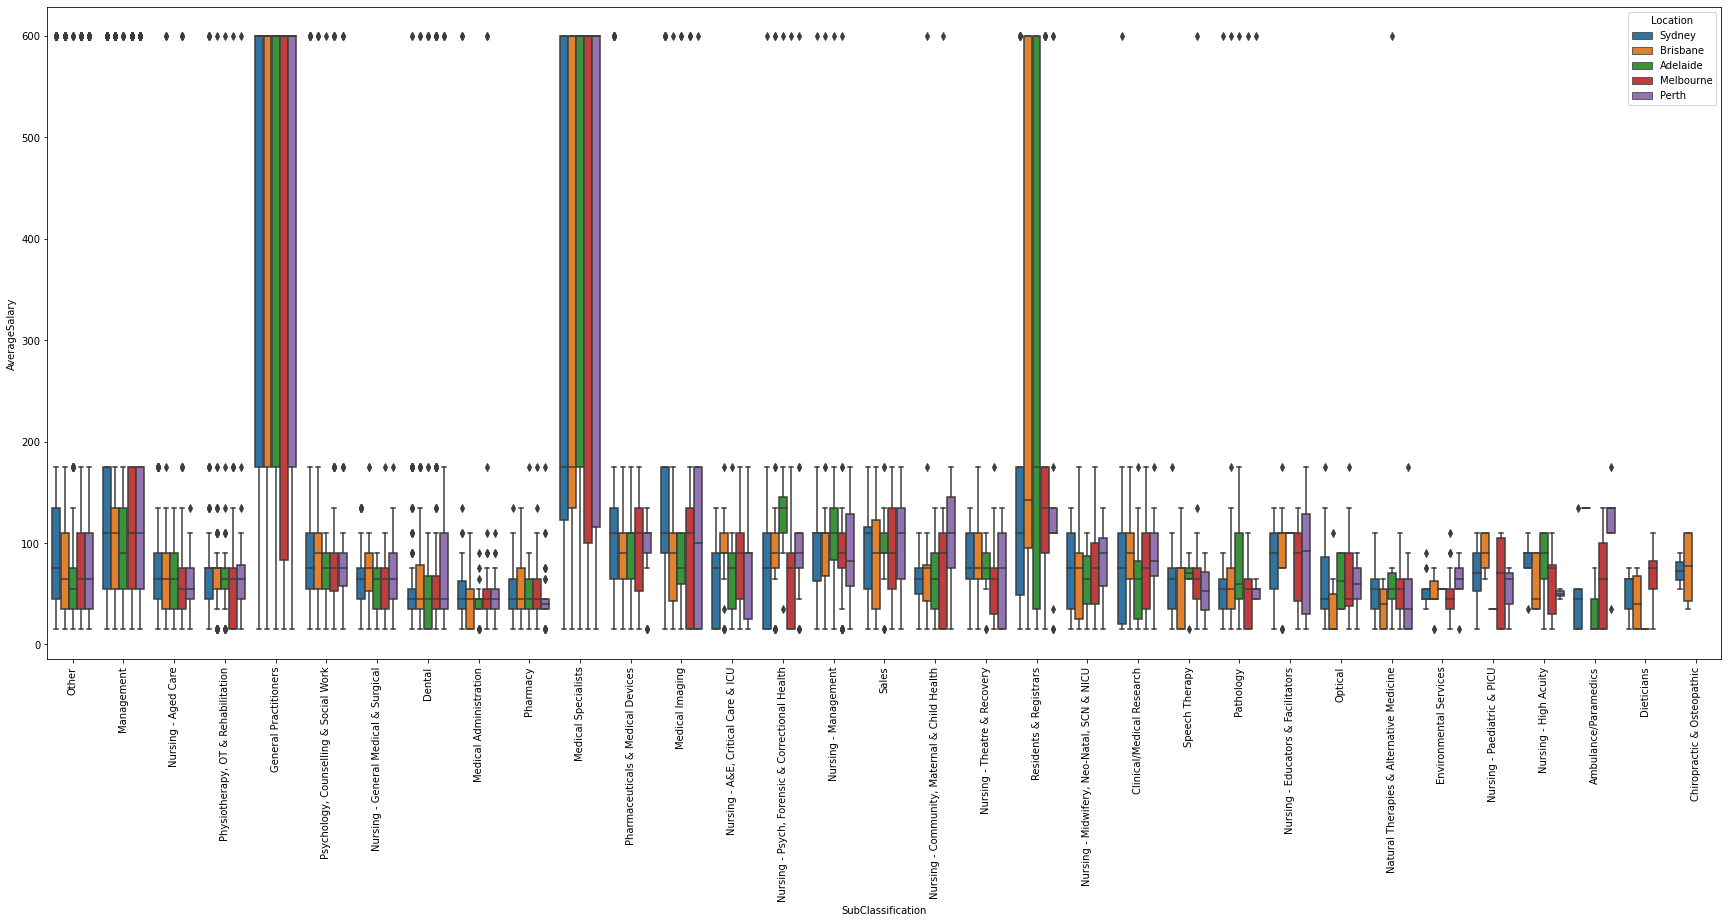

In [14]:
# Healthcare & Medical by Location

ictSubClasstn = df[df['Classification'] == "Healthcare & Medical"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(30,12))
plt.xticks(rotation=90)#,fontsize=20

df_x = df[df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'])]

sns.boxplot(
    data = df_x,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    #palette=sns.color_palette("Greens",n_colors=30),
    hue="Location"
)

plt.show()
#sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist,kind="box",hue="Location",height=10, aspect=4)

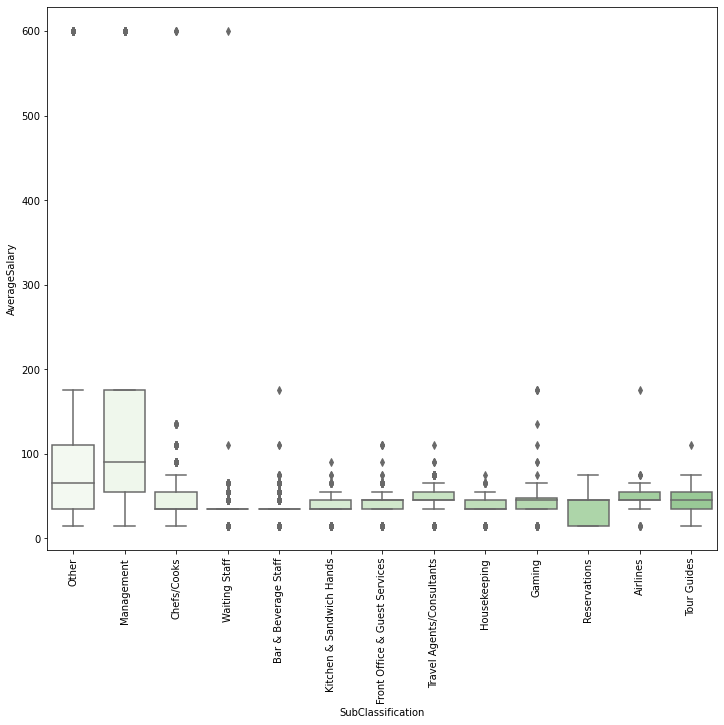

In [15]:
# Hospitality & Tourism 

ictSubClasstn = df[df['Classification'] == "Hospitality & Tourism"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

sns.boxplot(
    data = df,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    palette=sns.color_palette("Greens",n_colors=30)
)
plt.show()

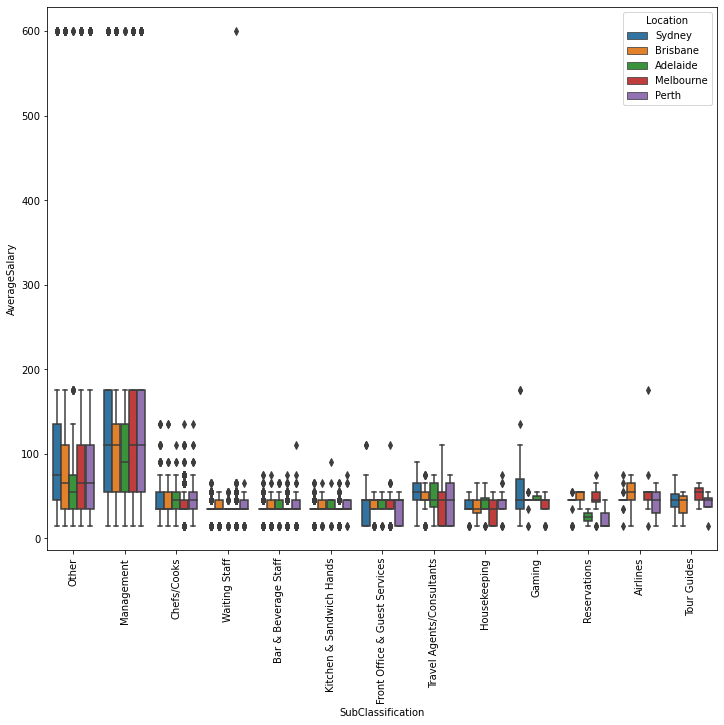

In [16]:
# Hospitality & Tourism by Location

ictSubClasstn = df[df['Classification'] == "Hospitality & Tourism"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

df_x = df[df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'])]

sns.boxplot(
    data = df_x,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    #palette=sns.color_palette("Greens",n_colors=30),
    hue="Location"
)

plt.show()
#sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist,kind="box",hue="Location",height=10, aspect=4)

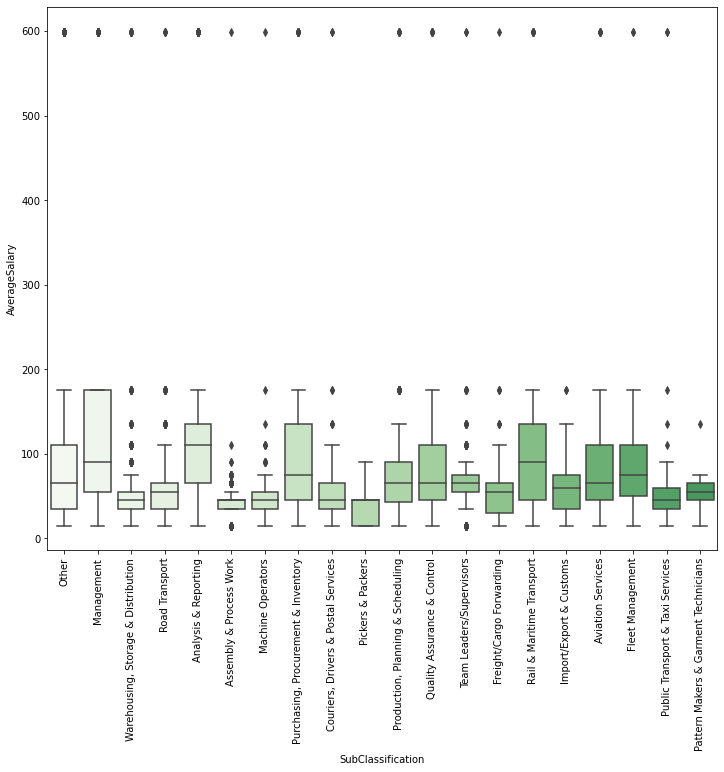

In [17]:
# Manufacturing, Transport & Logistics 

ictSubClasstn = df[df['Classification'] == "Manufacturing, Transport & Logistics"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

sns.boxplot(
    data = df,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    palette=sns.color_palette("Greens",n_colors=30)
)
plt.show()

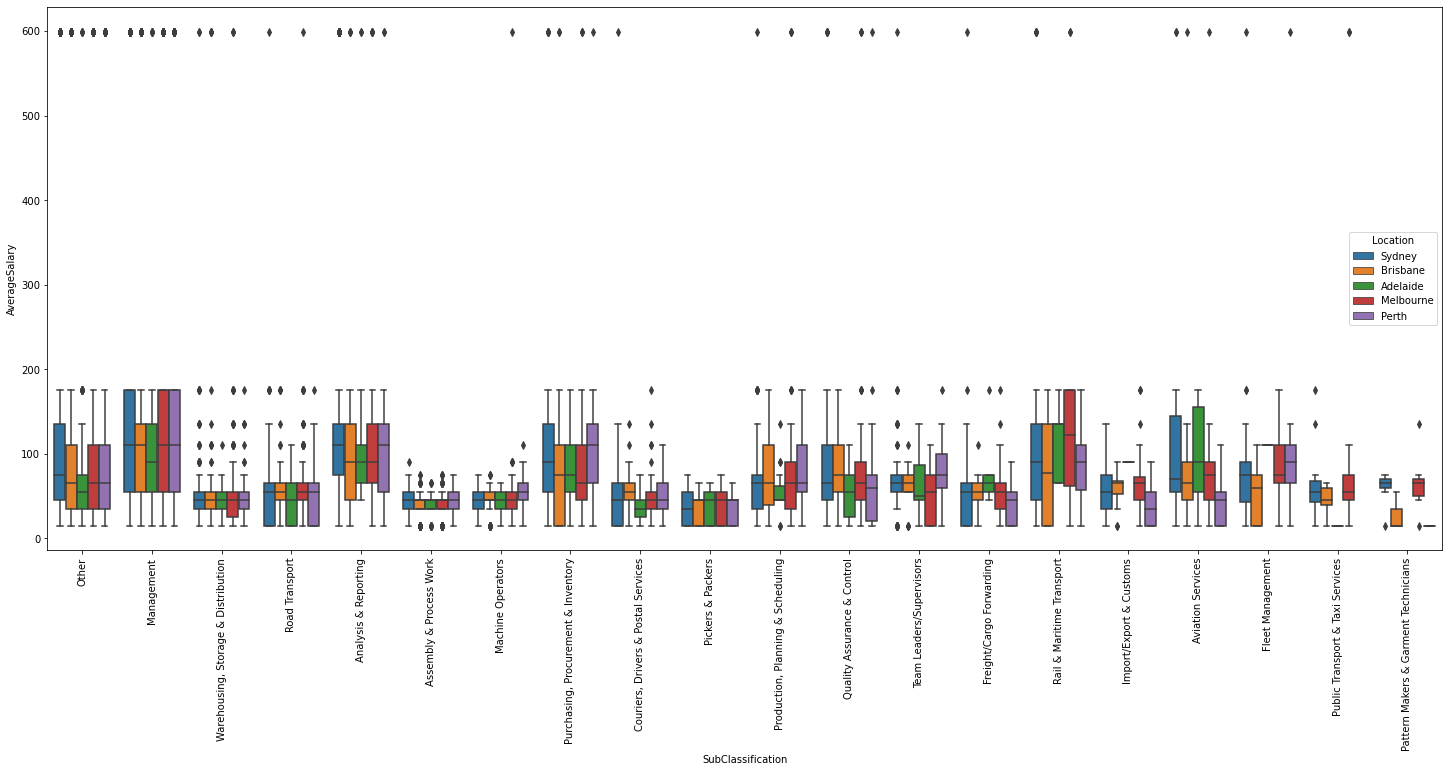

In [18]:
# Manufacturing, Transport & Logistics by Location

ictSubClasstn = df[df['Classification'] == "Manufacturing, Transport & Logistics"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)#,fontsize=20

df_x = df[df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'])]

sns.boxplot(
    data = df_x,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    #palette=sns.color_palette("Greens",n_colors=30),
    hue="Location"
)

plt.show()
#sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist,kind="box",hue="Location",height=10, aspect=4)

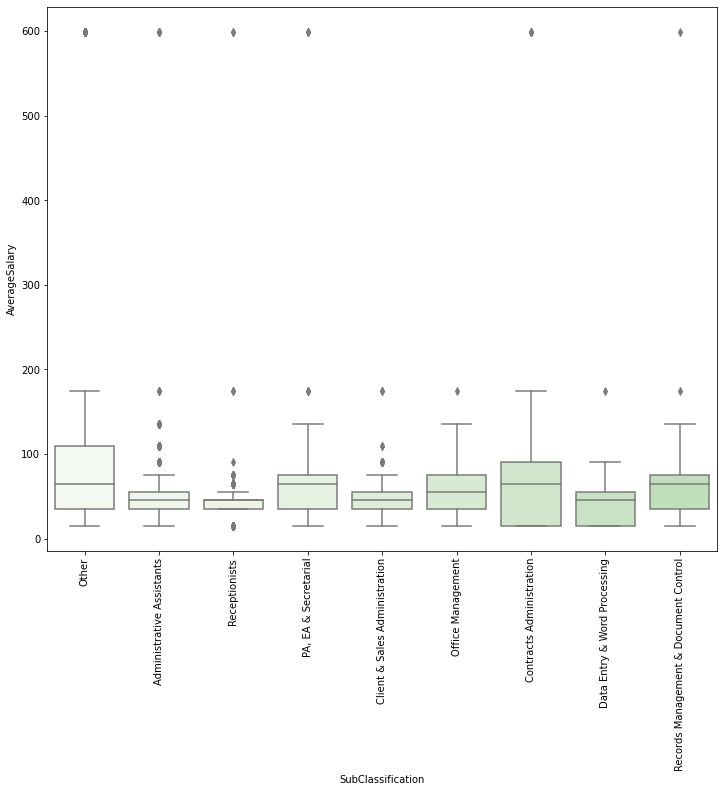

In [19]:
# Administration & Office Support 

ictSubClasstn = df[df['Classification'] == "Administration & Office Support"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

sns.boxplot(
    data = df,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    palette=sns.color_palette("Greens",n_colors=30)
)
plt.show()

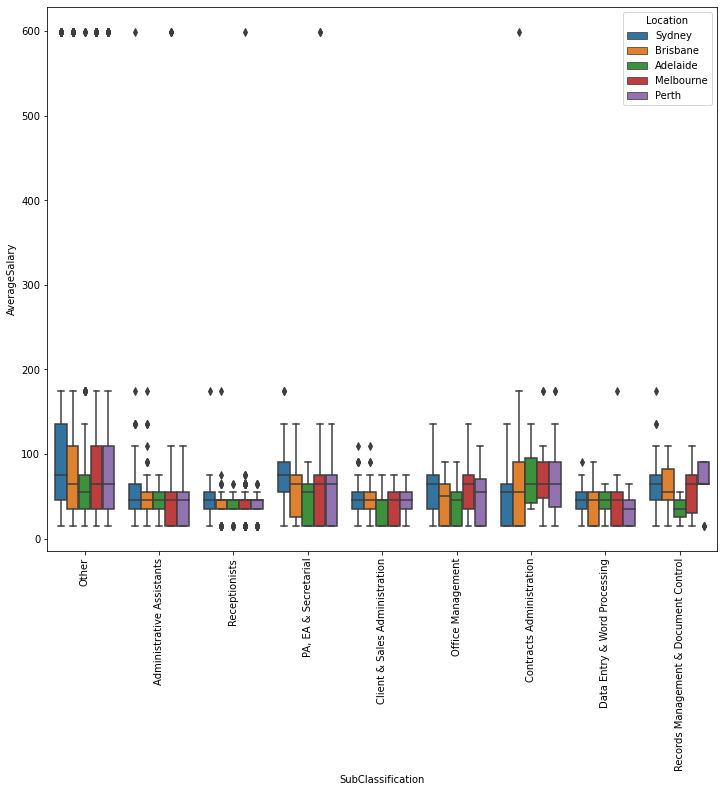

In [20]:
# Administration & Office Support by Location

ictSubClasstn = df[df['Classification'] == "Administration & Office Support"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

df_x = df[df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'])]

sns.boxplot(
    data = df_x,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    #palette=sns.color_palette("Greens",n_colors=30),
    hue="Location"
)

plt.show()
#sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist,kind="box",hue="Location",height=10, aspect=4)

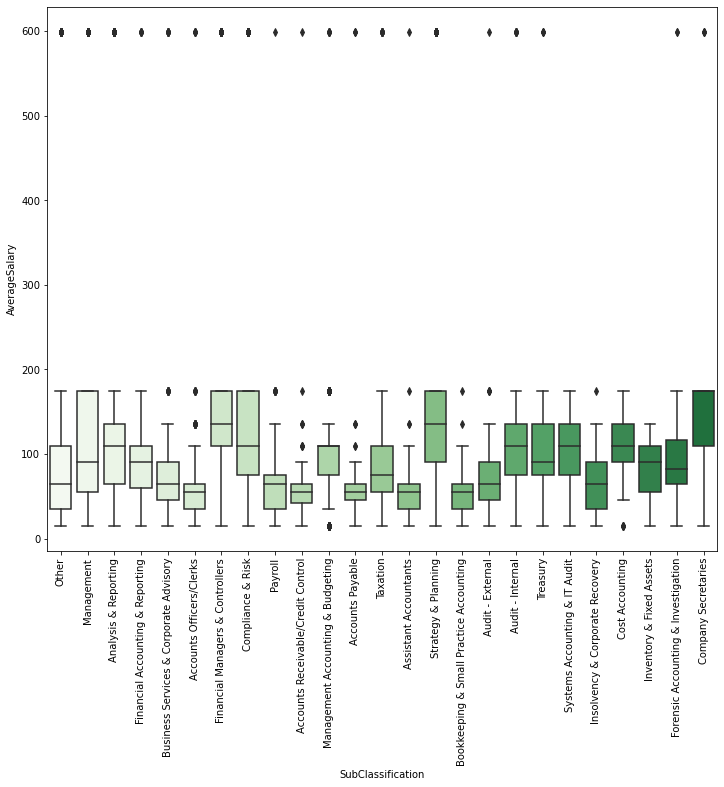

In [21]:
# Accounting 

ictSubClasstn = df[df['Classification'] == "Accounting"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

sns.boxplot(
    data = df,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    palette=sns.color_palette("Greens",n_colors=30)
)
plt.show()

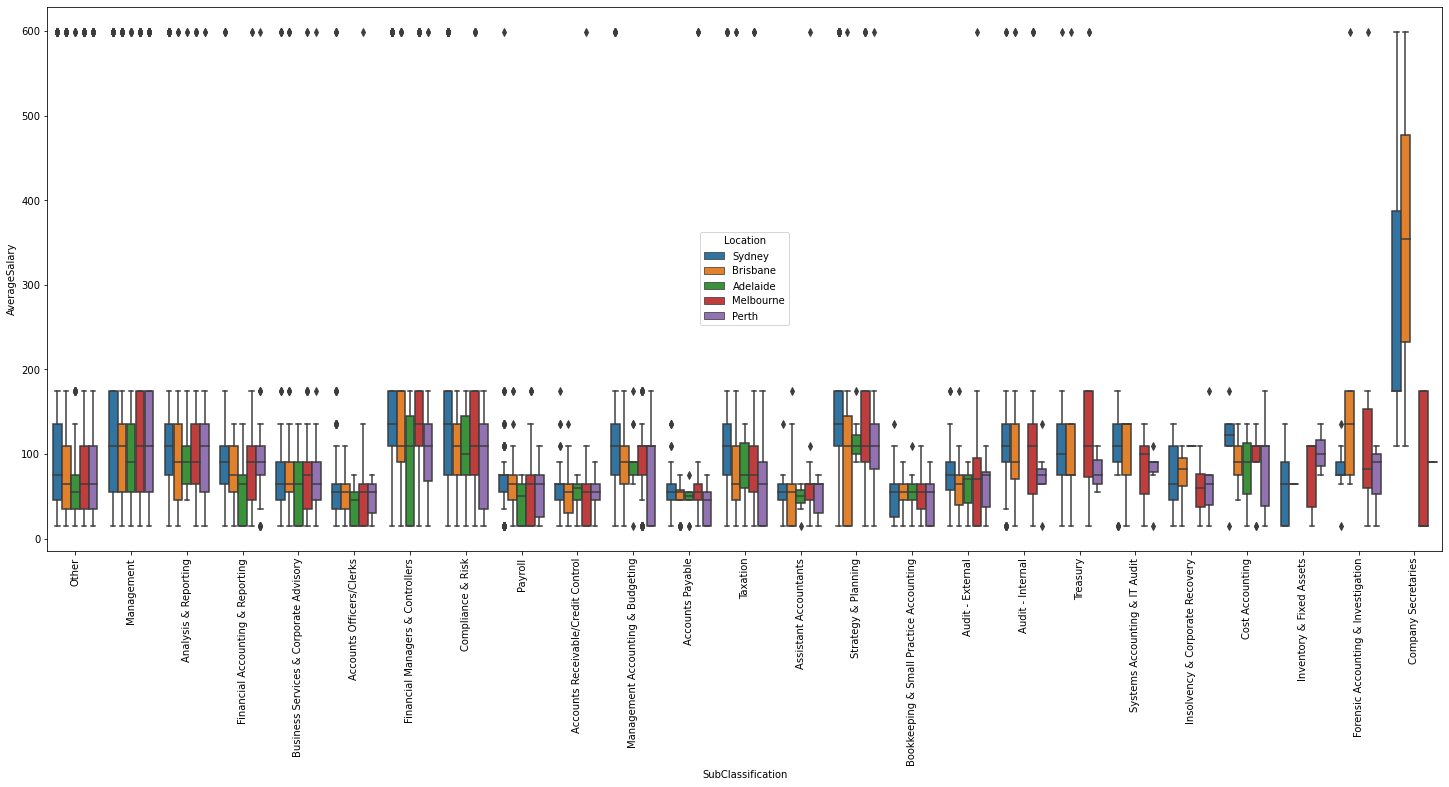

In [22]:
# Accounting by Location

ictSubClasstn = df[df['Classification'] == "Accounting"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)#,fontsize=20

df_x = df[df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'])]

sns.boxplot(
    data = df_x,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    #palette=sns.color_palette("Greens",n_colors=30),
    hue="Location"
)

plt.show()
#sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist,kind="box",hue="Location",height=10, aspect=4)

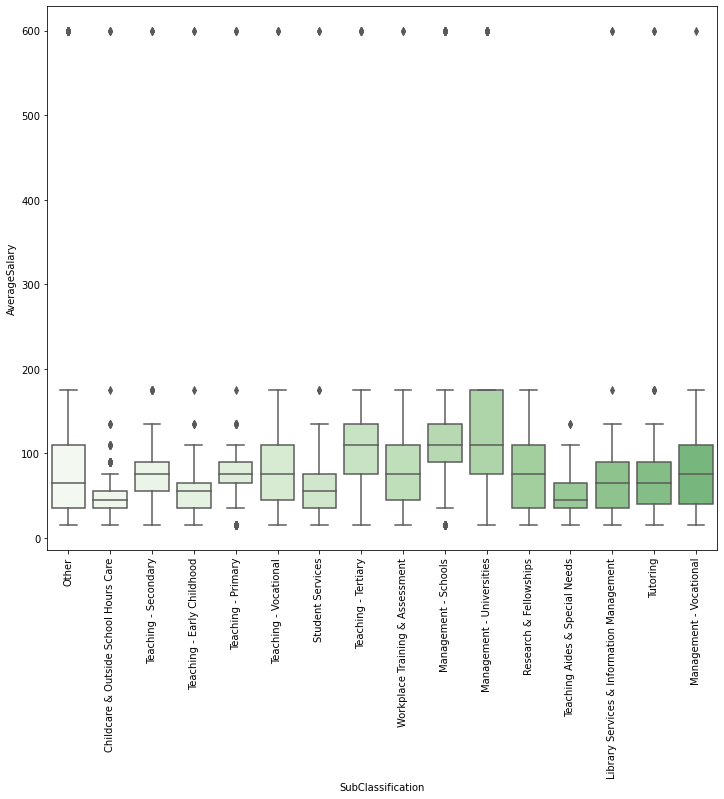

In [23]:
# Education & Training 

ictSubClasstn = df[df['Classification'] == "Education & Training"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

sns.boxplot(
    data = df,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    palette=sns.color_palette("Greens",n_colors=30)
)
plt.show()

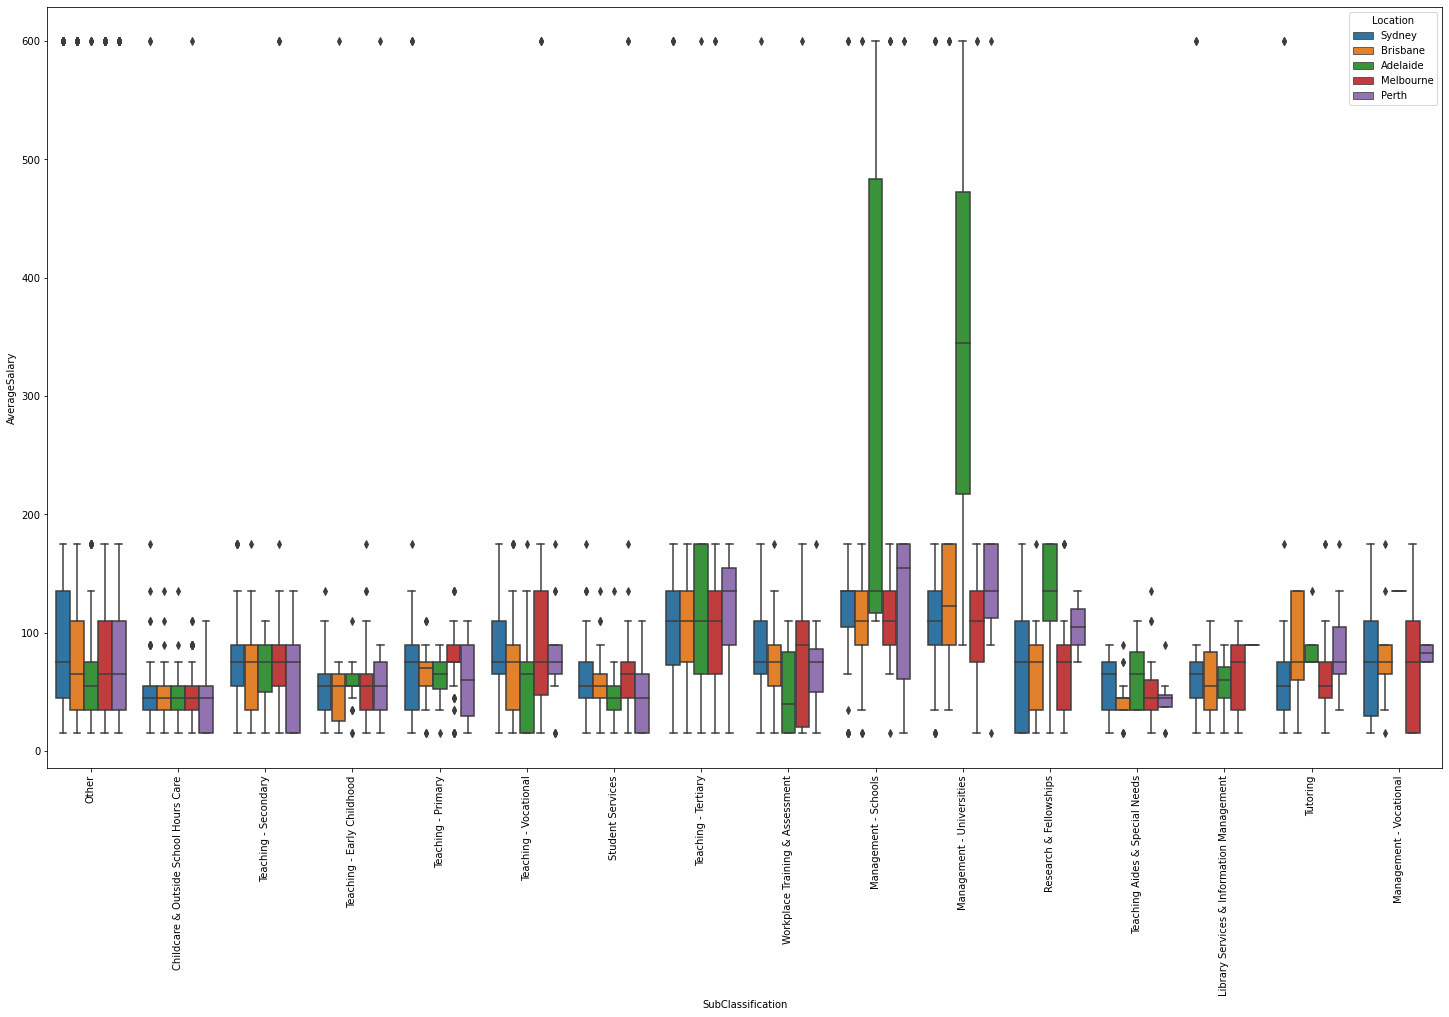

In [24]:
# Education & Training by Location

ictSubClasstn = df[df['Classification'] == "Education & Training"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(25,14))
plt.xticks(rotation=90)#,fontsize=20

df_x = df[df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'])]

sns.boxplot(
    data = df_x,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    #palette=sns.color_palette("Greens",n_colors=30),
    hue="Location",
)

plt.show()
#sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist,kind="box",hue="Location",height=10, aspect=4)

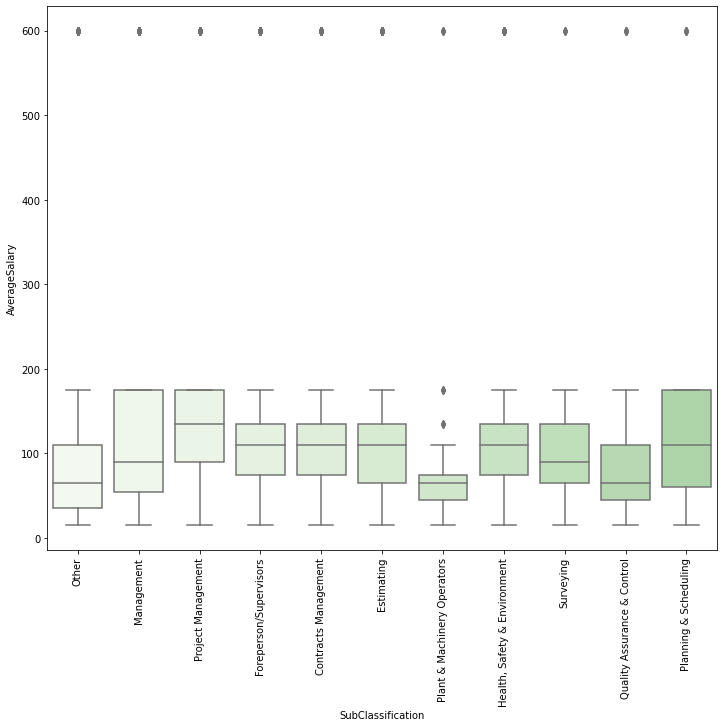

In [25]:
# Construction 

ictSubClasstn = df[df['Classification'] == "Construction"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

sns.boxplot(
    data = df,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    palette=sns.color_palette("Greens",n_colors=30)
)
plt.show()

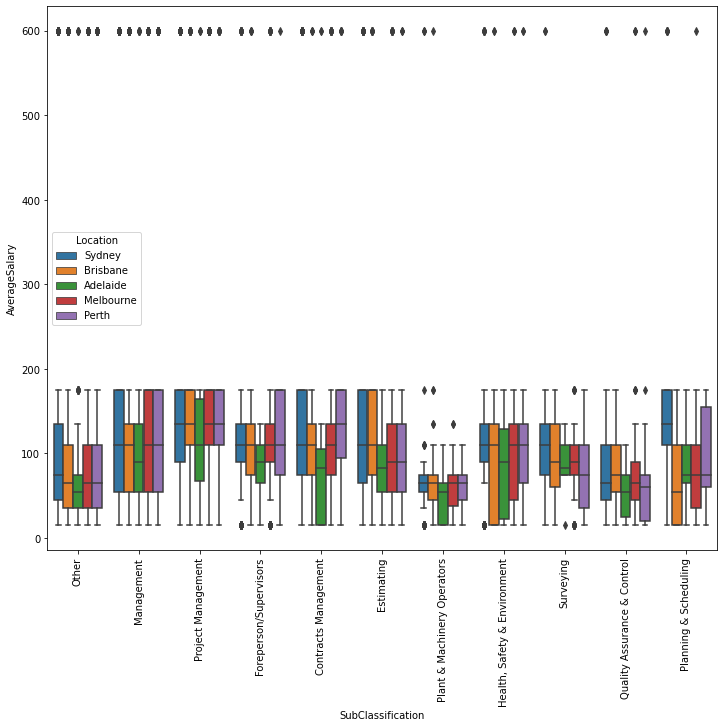

In [26]:
# Construction by Location

ictSubClasstn = df[df['Classification'] == "Construction"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

df_x = df[df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'])]

sns.boxplot(
    data = df_x,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    #palette=sns.color_palette("Greens",n_colors=30),
    hue="Location"
)

plt.show()
#sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist,kind="box",hue="Location",height=10, aspect=4)

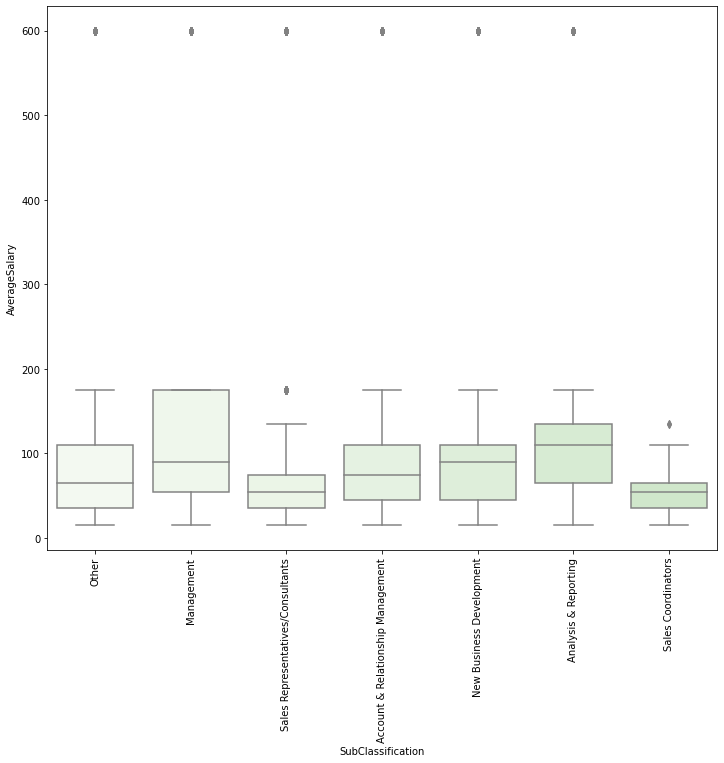

In [33]:
# Sales 

ictSubClasstn = df[df['Classification'] == "Sales"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

sns.boxplot(
    data = df,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    palette=sns.color_palette("Greens",n_colors=30),
)

plt.show()
#sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist,kind="box",hue="Location",height=10, aspect=4)

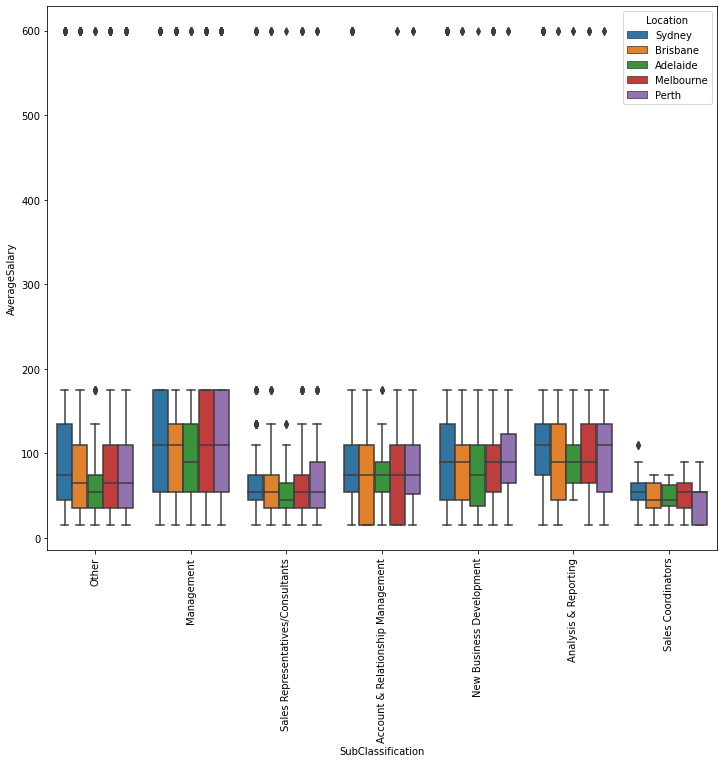

In [34]:
# Sales by Location

ictSubClasstn = df[df['Classification'] == "Sales"]
ictSubClasstn["SubClassification"].value_counts().index
#----------------------
ClassificationDf = df[df['SubClassification'].isin(ictSubClasstn["SubClassification"].values)]
ClassificationDf = ClassificationDf.groupby('SubClassification').count()
ClassificationDf['SubClassification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)
#----------------------
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20

df_x = df[df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'])]

sns.boxplot(
    data = df_x,
    x="SubClassification",
    y="AverageSalary",
    order=ClassificationDf['SubClassification'],
    #order=ClassificationDf['Classification'],
    #palette=sns.color_palette("Greens",n_colors=30),
    hue="Location"
)

plt.show()
#sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist,kind="box",hue="Location",height=10, aspect=4)

### Part_2 2)Posting Paterns

In [39]:
salaryDf = df[df['Classification'].isna()==False]
salaryDf = salaryDf.groupby('LowestSalary').count()
salaryDf['lowestSalary'] = salaryDf.index

salaryDf.sort_values("lowestSalary",ascending=False,inplace=True)

minSalaries = salaryDf["lowestSalary"]

minSalaries = salaryDf.iloc[:,13].values
#minSalaries # array([200, 150, 120, 100,  80,  70,  60,  50,  40,  30,   0])

df_200 = df[df['LowestSalary'] == 200]
df_150 = df[df['LowestSalary'] == 150]
df_120 = df[df['LowestSalary'] == 120]
df_100 = df[df['LowestSalary'] == 100]
df_80 = df[df['LowestSalary'] == 80]
df_70 = df[df['LowestSalary'] == 70]
df_60 = df[df['LowestSalary'] == 60]
df_50 = df[df['LowestSalary'] == 50]
df_40 = df[df['LowestSalary'] == 40]
df_30 = df[df['LowestSalary'] == 30]
df_0 = df[df['LowestSalary'] == 0]

df_lowestSalary = pd.concat([df_200,df_150,df_120,df_100,df_80,df_70,df_60,df_50,df_40,df_30,df_0])
# df_lowestSalary.shape # 318477
# df.shape # 318477



In [40]:
salaryDf = df[df['Classification'].isna()==False]
salaryDf = salaryDf.groupby('AverageSalary').count()
salaryDf['AvgSalary'] = salaryDf.index

salaryDf.sort_values("AvgSalary",ascending=False,inplace=True)

avgSalaries = salaryDf["AvgSalary"]

avgSalaries = salaryDf.iloc[:,13].values
avgSalaries

array([ 7938, 15006, 14176, 16566, 12430, 16466, 17621, 16020, 21158,
       15408, 32947])

In [41]:
df_group = df.groupby('Classification').count()
df_group

,Unnamed: 0,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
Classification,,,,,,,,,,,,,,
Accounting,9368,9368,9368,9056,9368,9368,7308,9368,9368,8760,9368,9368,8760,9368
Administration & Office Support,10020,10020,10020,9534,10020,10020,6843,10020,10020,9215,10020,10020,9215,10020
"Advertising, Arts & Media",833,833,833,808,833,833,555,833,833,802,833,833,803,833
Banking & Financial Services,4633,4633,4633,4574,4633,4633,3456,4633,4633,4310,4633,4633,4311,4633
CEO & General Management,844,844,844,811,844,844,430,844,844,783,844,844,783,844
Call Centre & Customer Service,3971,3971,3971,3858,3971,3971,3065,3971,3971,3659,3971,3971,3659,3971
Community Services & Development,4485,4485,4485,4350,4485,4485,2144,4485,4483,4262,4485,4485,4267,4485
Construction,8372,8372,8372,8042,8372,8372,5057,8372,8372,8022,8372,8372,8023,8372
Consulting & Strategy,1206,1206,1206,1186,1206,1206,816,1206,1206,1140,1206,1206,1140,1206


In [42]:
df = pd.read_csv('preprocessed_data.csv', low_memory=False)
df_loc_dist = df[df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'])]
df_loc_dist = df_loc_dist[df_loc_dist['Classification'].isin(['Information & Communication Technology', 'Trades & Services',
       'Healthcare & Medical', 'Hospitality & Tourism',
       'Manufacturing, Transport & Logistics',
       'Administration & Office Support', 'Accounting',
       'Education & Training', 'Construction', 'Sales'])]
df_loc_dist.reset_index()
df_loc_dist
#sns.relplot(x="LowestSalary",y="SubClassification",data=df_loc_dist,kind="scatter",hue="Location",size="HighestSalary")

,Unnamed: 0,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
6,6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN,15.0
7,7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,15.0
9,9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN,15.0
12,12,37404341,Functions Supervisor - Perth Zoo,Mustard Catering,2018-10-07,Perth,NaN,Hospitality & Tourism,Bar & Beverage Staff,Casual Food and Beverage Supervisor,NaN,0,30,NaN,15.0
14,14,37404250,Casual Cleaner in Kew,Jora Local,2018-10-07,Melbourne,Eastern Suburbs,Hospitality & Tourism,Housekeeping,A restaurant in Kew is seeking a casual Cleane...,NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197218,197218,37828374,IT Test Analyst OR Senior IT Test Analyst,Paxus,2018-11-29,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Testing & Quality Assurance,Great opportunity for a IT Test Analyst/Senio...,<p>Leading financial sector is seeking an IT T...,200,999,Contract/Temp,599.5
197219,197219,37828361,Medical Officer,Coal Services Pty Ltd,2018-11-29,Brisbane,NaN,Healthcare & Medical,General Practitioners,Coal Services Health are looking for a Medical...,<p>&nbsp;</p>\n <ul>\n <li><st...,200,999,Full Time,599.5
197222,197222,37828315,"Contracts Manager - Commercial Lead Required, ...",Quinton Anthony P/L,2018-11-29,Sydney,"CBD, Inner West & Eastern Suburbs",Construction,Contracts Management,National $2 billion builder seeking Contracts ...,<p>This privately owned leading national const...,200,999,Full Time,599.5
197225,197225,37828093,Construction Manager Required - Commercial & A...,Constructive Recruitment Pty Ltd,2018-11-29,Melbourne,CBD & Inner Suburbs,Construction,Project Management,Career defining role with buoyant commercial/a...,<ul>\n <li>Growing &amp; financially ...,200,999,Full Time,599.5


In [47]:
df_loc_dist.shape
# 130915
# 99524

(99524, 15)

In [48]:
df.shape # 318477

(318477, 15)

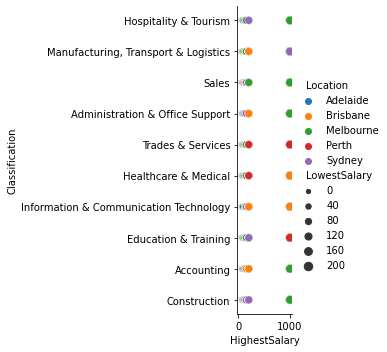

In [49]:
sns.relplot(x="HighestSalary",y="Classification",data=df_loc_dist,kind="scatter",hue="Location",size="LowestSalary")

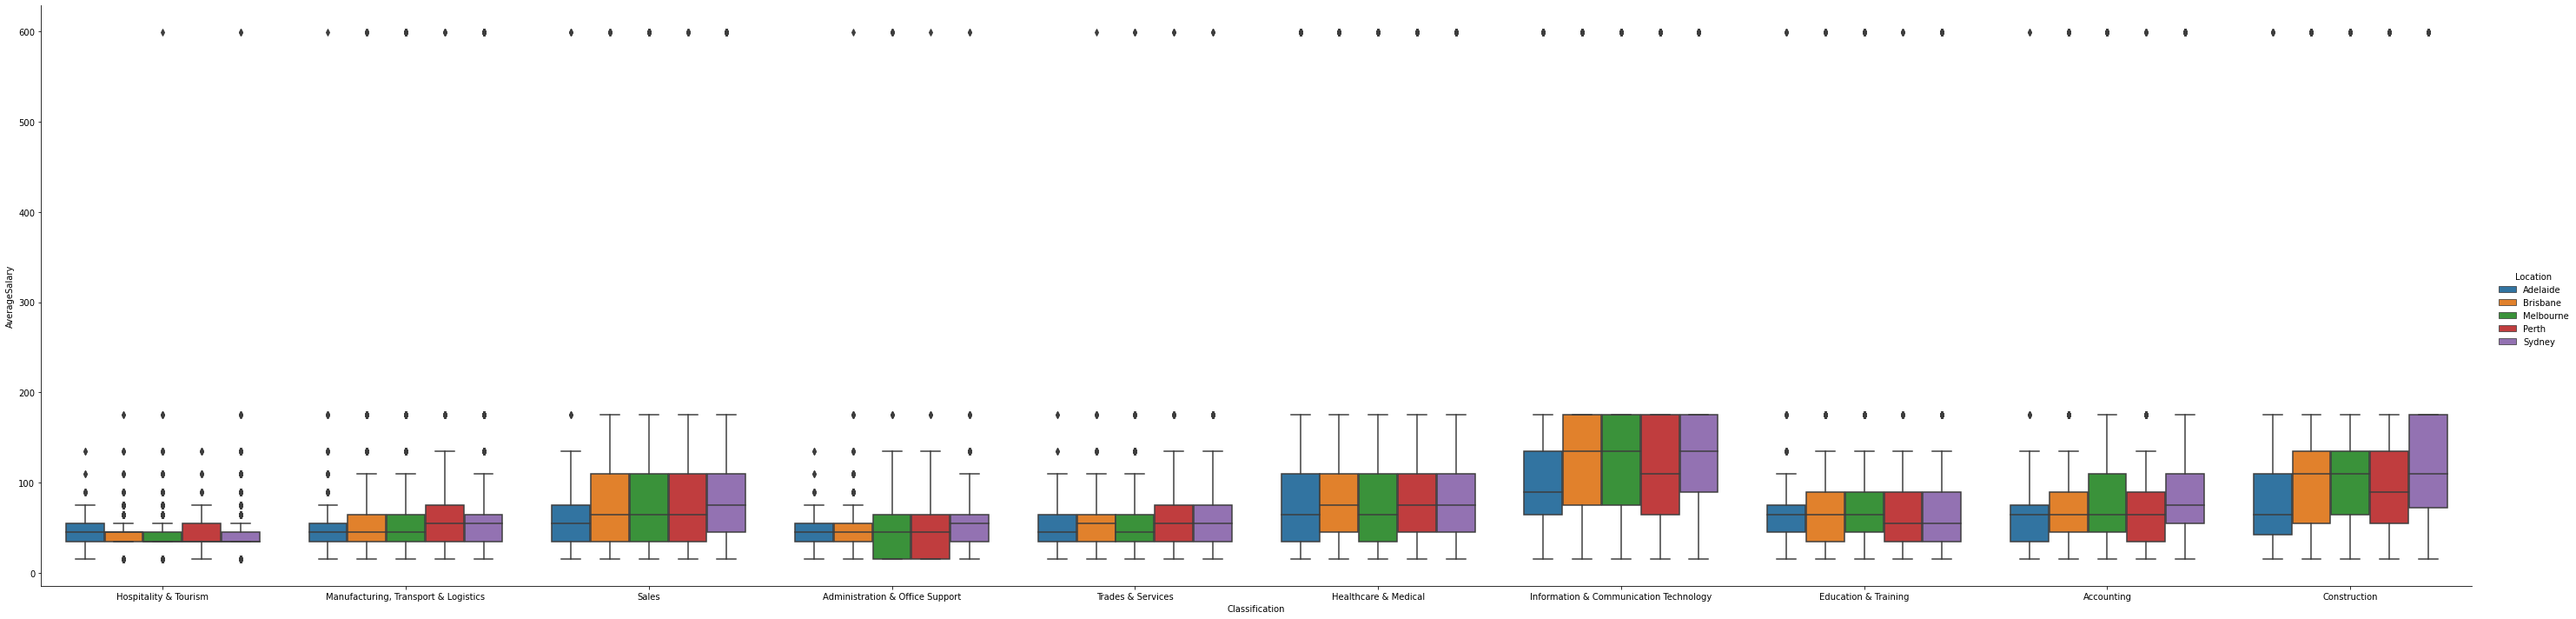

In [50]:
# plt.figure(figsize=(10,4))
# plt.xticks(rotation=90)#fontsize=20
# plt.title("Distribution of Lowest Salaries")

# fig, ax = plt.subplots(figsize=(10,5))



#plt.figure(figsize=(20,5))
#height=5, aspect=2
sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist,kind="box",hue="Location",height=10, aspect=4)

# plt.show()

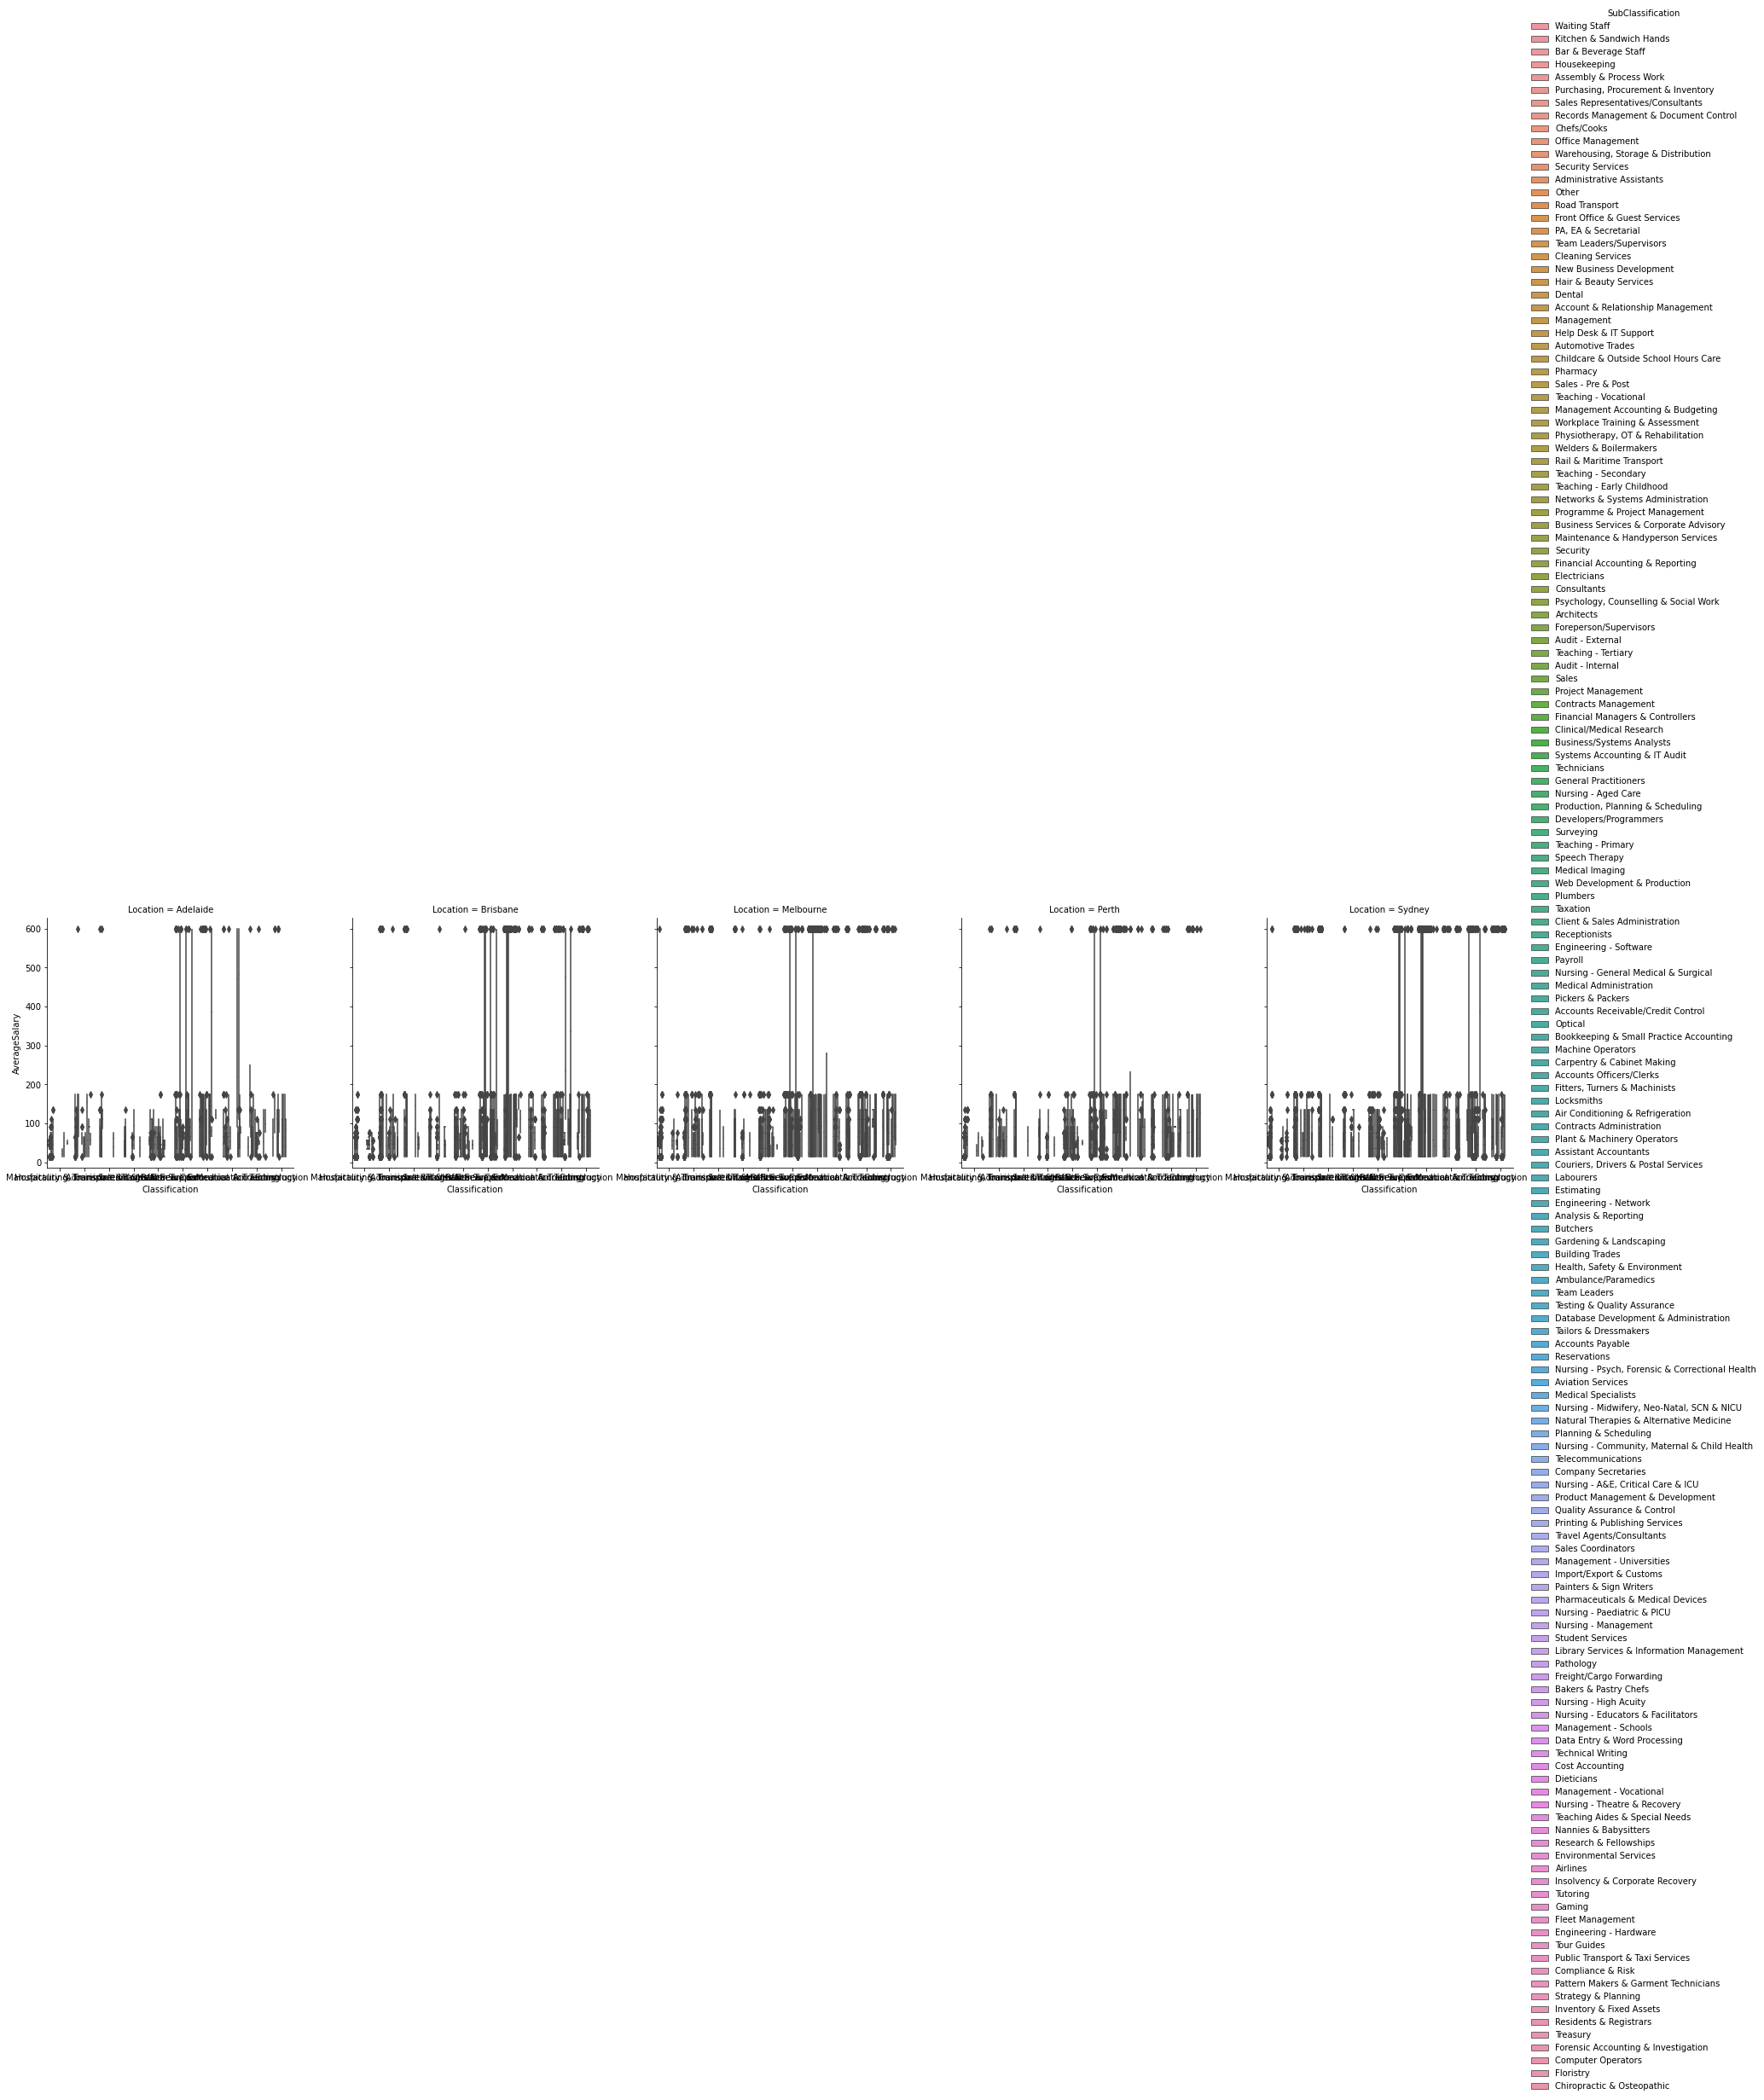

In [51]:
sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist,kind="box",hue="SubClassification",col="Location")

In [52]:
ts_top_5 = ['Automotive Trades', 'Electricians', 'Labourers','Fitters, Turners & Machinists','Technicians']
ict_top_5 = ['Developers/Programmers', 'Business/Systems Analysts','Programme & Project Management', 'Architects','Engineering - Software']
hm_top_5 = ['Nursing - Aged Care', 'Physiotherapy, OT & Rehabilitation','General Practitioners', 'Psychology, Counselling & Social Work','Nursing - General Medical & Surgical']
ht_top_5 = ['Chefs/Cooks', 'Waiting Staff', 'Bar & Beverage Staff', 'Management','Kitchen & Sandwich Hands']
mtt_top_5 = ['Warehousing, Storage & Distribution', 'Road Transport','Assembly & Process Work', 'Machine Operators','Purchasing, Procurement & Inventory']
ba_top_5 = ['Administrative Assistants', 'Receptionists', 'PA, EA & Secretarial','Client & Sales Administration', 'Office Management']
acc_top_5 = ['Financial Accounting & Reporting','Business Services & Corporate Advisory', 'Accounts Officers/Clerks','Financial Managers & Controllers', 'Payroll']
edu_top_5 = ['Childcare & Outside School Hours Care', 'Other','Teaching - Secondary', 'Teaching - Early Childhood','Teaching - Primary']
con_top_5 = ['Project Management', 'Foreperson/Supervisors', 'Contracts Management','Other', 'Estimating']
sale_top_5 = ['Sales Representatives/Consultants', 'New Business Development','Account & Relationship Management', 'Management', 'Sales Coordinators']

all_top_5_OF_10 = ['Automotive Trades', 'Electricians', 'Labourers','Fitters, Turners & Machinists','Technicians','Developers/Programmers', 'Business/Systems Analysts','Programme & Project Management', 'Architects','Engineering - Software','Nursing - Aged Care', 'Physiotherapy, OT & Rehabilitation','General Practitioners', 'Psychology, Counselling & Social Work','Nursing - General Medical & Surgical','Chefs/Cooks', 'Waiting Staff', 'Bar & Beverage Staff', 'Management','Kitchen & Sandwich Hands','Warehousing, Storage & Distribution', 'Road Transport','Assembly & Process Work', 'Machine Operators','Purchasing, Procurement & Inventory','Administrative Assistants', 'Receptionists', 'PA, EA & Secretarial','Client & Sales Administration', 'Office Management','Financial Accounting & Reporting','Business Services & Corporate Advisory', 'Accounts Officers/Clerks','Financial Managers & Controllers', 'Payroll','Childcare & Outside School Hours Care', 'Other','Teaching - Secondary', 'Teaching - Early Childhood','Teaching - Primary','Project Management', 'Foreperson/Supervisors', 'Contracts Management','Other', 'Estimating','Sales Representatives/Consultants', 'New Business Development','Account & Relationship Management', 'Management', 'Sales Coordinators']
all_top_5_OF_5 = ['Automotive Trades', 'Electricians', 'Labourers','Fitters, Turners & Machinists','Technicians','Developers/Programmers', 'Business/Systems Analysts','Programme & Project Management', 'Architects','Engineering - Software','Nursing - Aged Care', 'Physiotherapy, OT & Rehabilitation','General Practitioners', 'Psychology, Counselling & Social Work','Nursing - General Medical & Surgical','Chefs/Cooks', 'Waiting Staff', 'Bar & Beverage Staff', 'Management','Kitchen & Sandwich Hands','Warehousing, Storage & Distribution', 'Road Transport','Assembly & Process Work', 'Machine Operators']

# len(all_top_5) #50
df_loc_dist_topSubsectors = df_loc_dist[df_loc_dist['SubClassification'].isin(all_top_5_OF_10)]
#df_loc_dist.shape # 99524
df_loc_dist_topSubsectors.shape # 69470

(69470, 15)

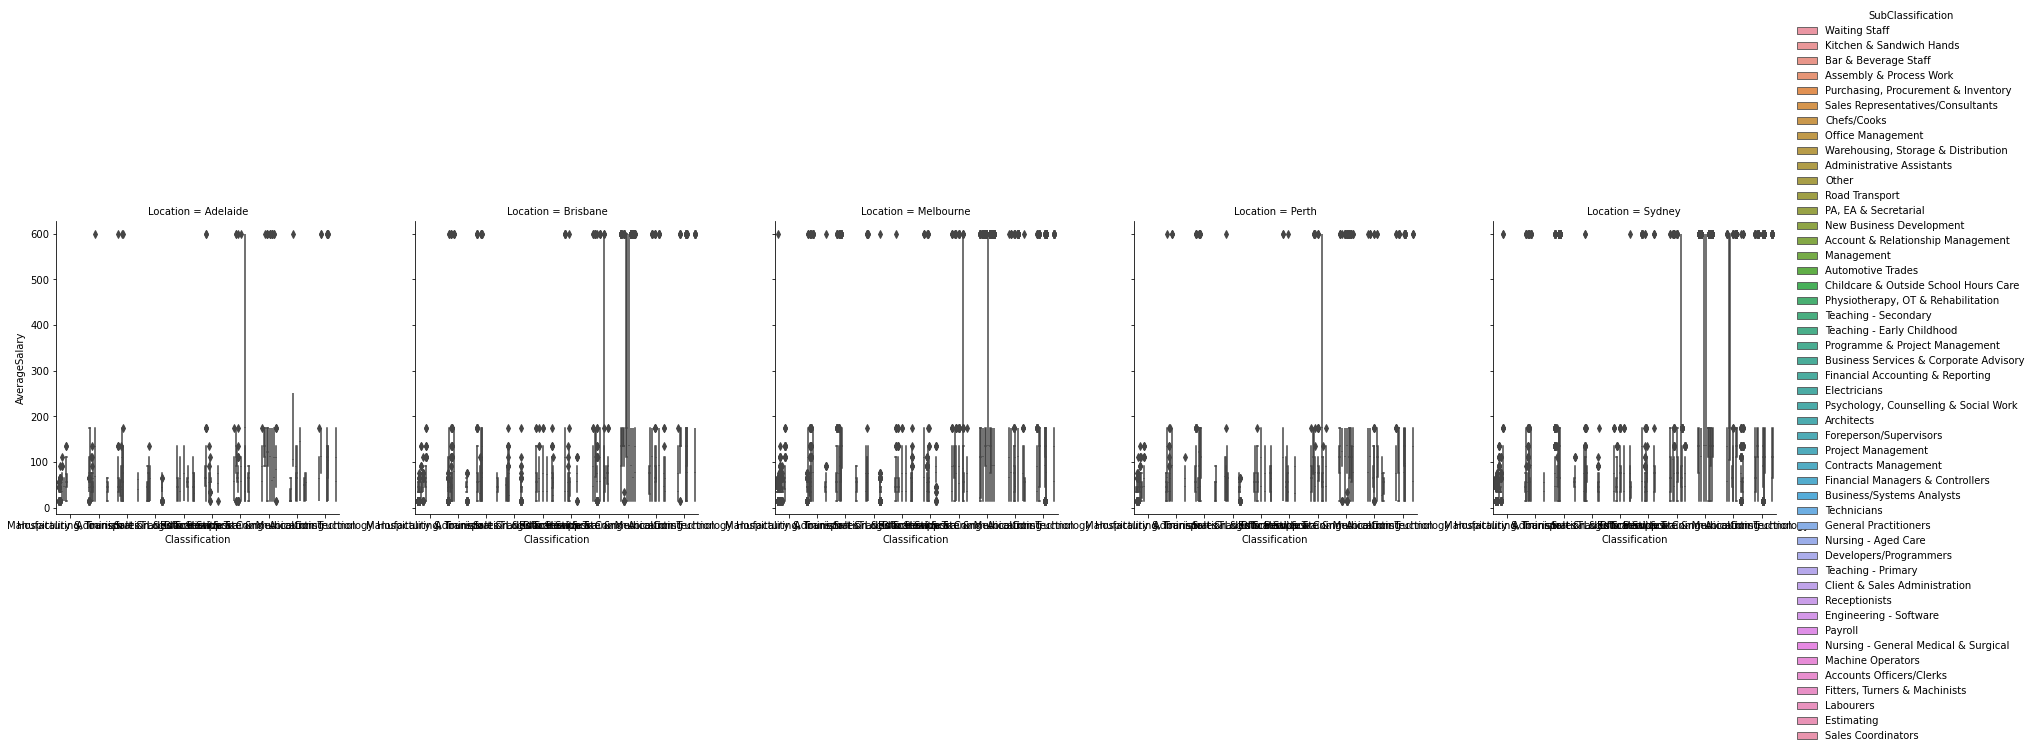

In [53]:
sns.catplot(x="Classification",y="AverageSalary",data=df_loc_dist_topSubsectors,kind="box",hue="SubClassification",col="Location")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         318477 non-null  int64  
 1   Id                 318477 non-null  int64  
 2   Title              318477 non-null  object 
 3   Company            306473 non-null  object 
 4   Date               318477 non-null  object 
 5   Location           197229 non-null  object 
 6   Area               122658 non-null  object 
 7   Classification     197229 non-null  object 
 8   SubClassification  197229 non-null  object 
 9   Requirement        318470 non-null  object 
 10  FullDescription    302302 non-null  object 
 11  LowestSalary       318477 non-null  int64  
 12  HighestSalary      318477 non-null  int64  
 13  JobType            302379 non-null  object 
 14  AverageSalary      318477 non-null  float64
dtypes: float64(1), int64(4), object(10)
memory usage: 3

In [55]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]

locationDf.sort_values("Count",ascending=False,inplace=True)

#Get top 10 big cities
locationDf = locationDf.sort_values(by=["Count"], ascending =False)
locationTop10Df = locationDf[:10].copy()
#others
new_row = pd.DataFrame(data = {
    'Location' : ['Others'],
    'Count' : [locationDf["Count"][10:].sum()]
})
locationTop10Df = pd.concat([locationTop10Df, new_row],sort=False)
locationTop10Df.index = locationTop10Df['Location']
locationTop10Df_sorted = locationTop10Df.sort_values(by=["Count"], ascending =False)

In [56]:
df_loc_dist = df[df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'])]
all_top_5_OF_10


['Automotive Trades',
 'Electricians',
 'Labourers',
 'Fitters, Turners & Machinists',
 'Technicians',
 'Developers/Programmers',
 'Business/Systems Analysts',
 'Programme & Project Management',
 'Architects',
 'Engineering - Software',
 'Nursing - Aged Care',
 'Physiotherapy, OT & Rehabilitation',
 'General Practitioners',
 'Psychology, Counselling & Social Work',
 'Nursing - General Medical & Surgical',
 'Chefs/Cooks',
 'Waiting Staff',
 'Bar & Beverage Staff',
 'Management',
 'Kitchen & Sandwich Hands',
 'Warehousing, Storage & Distribution',
 'Road Transport',
 'Assembly & Process Work',
 'Machine Operators',
 'Purchasing, Procurement & Inventory',
 'Administrative Assistants',
 'Receptionists',
 'PA, EA & Secretarial',
 'Client & Sales Administration',
 'Office Management',
 'Financial Accounting & Reporting',
 'Business Services & Corporate Advisory',
 'Accounts Officers/Clerks',
 'Financial Managers & Controllers',
 'Payroll',
 'Childcare & Outside School Hours Care',
 'Other',


### Study Market by Location

In [57]:
# Market size in each city

In [58]:
def prepareByCity(df, location):
    dfx = df[df["Location"] == location]
    df_pie = dfx['Classification'].groupby(df['Classification'])

    df_pie = df_pie.count().sort_values(ascending=False).to_frame()
    df_pie['Value'] = df_pie["Classification"]
    df_pie['Classification'] = df_pie.index
    df2 = df_pie[:10].copy()
    new_row = pd.DataFrame(data = {
        'Classification' : ['Others'],
        'Value' : [df_pie["Value"][10:].sum()]
    })

    df2 = pd.concat([df2, new_row])
    df2.index = df2['Classification']

    df2
    return df2

In [59]:
#'Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'
sydeny_market = prepareByCity(df,"Sydney")
melbourne_market = prepareByCity(df,"Melbourne")
brisbane_market = prepareByCity(df,"Brisbane")
perth_market = prepareByCity(df,"Perth")
adelaide_market = prepareByCity(df,"Adelaide")

Text(0.5, 1.0, 'Distribution of Sectors in the Workforce -- ADELAIDE')

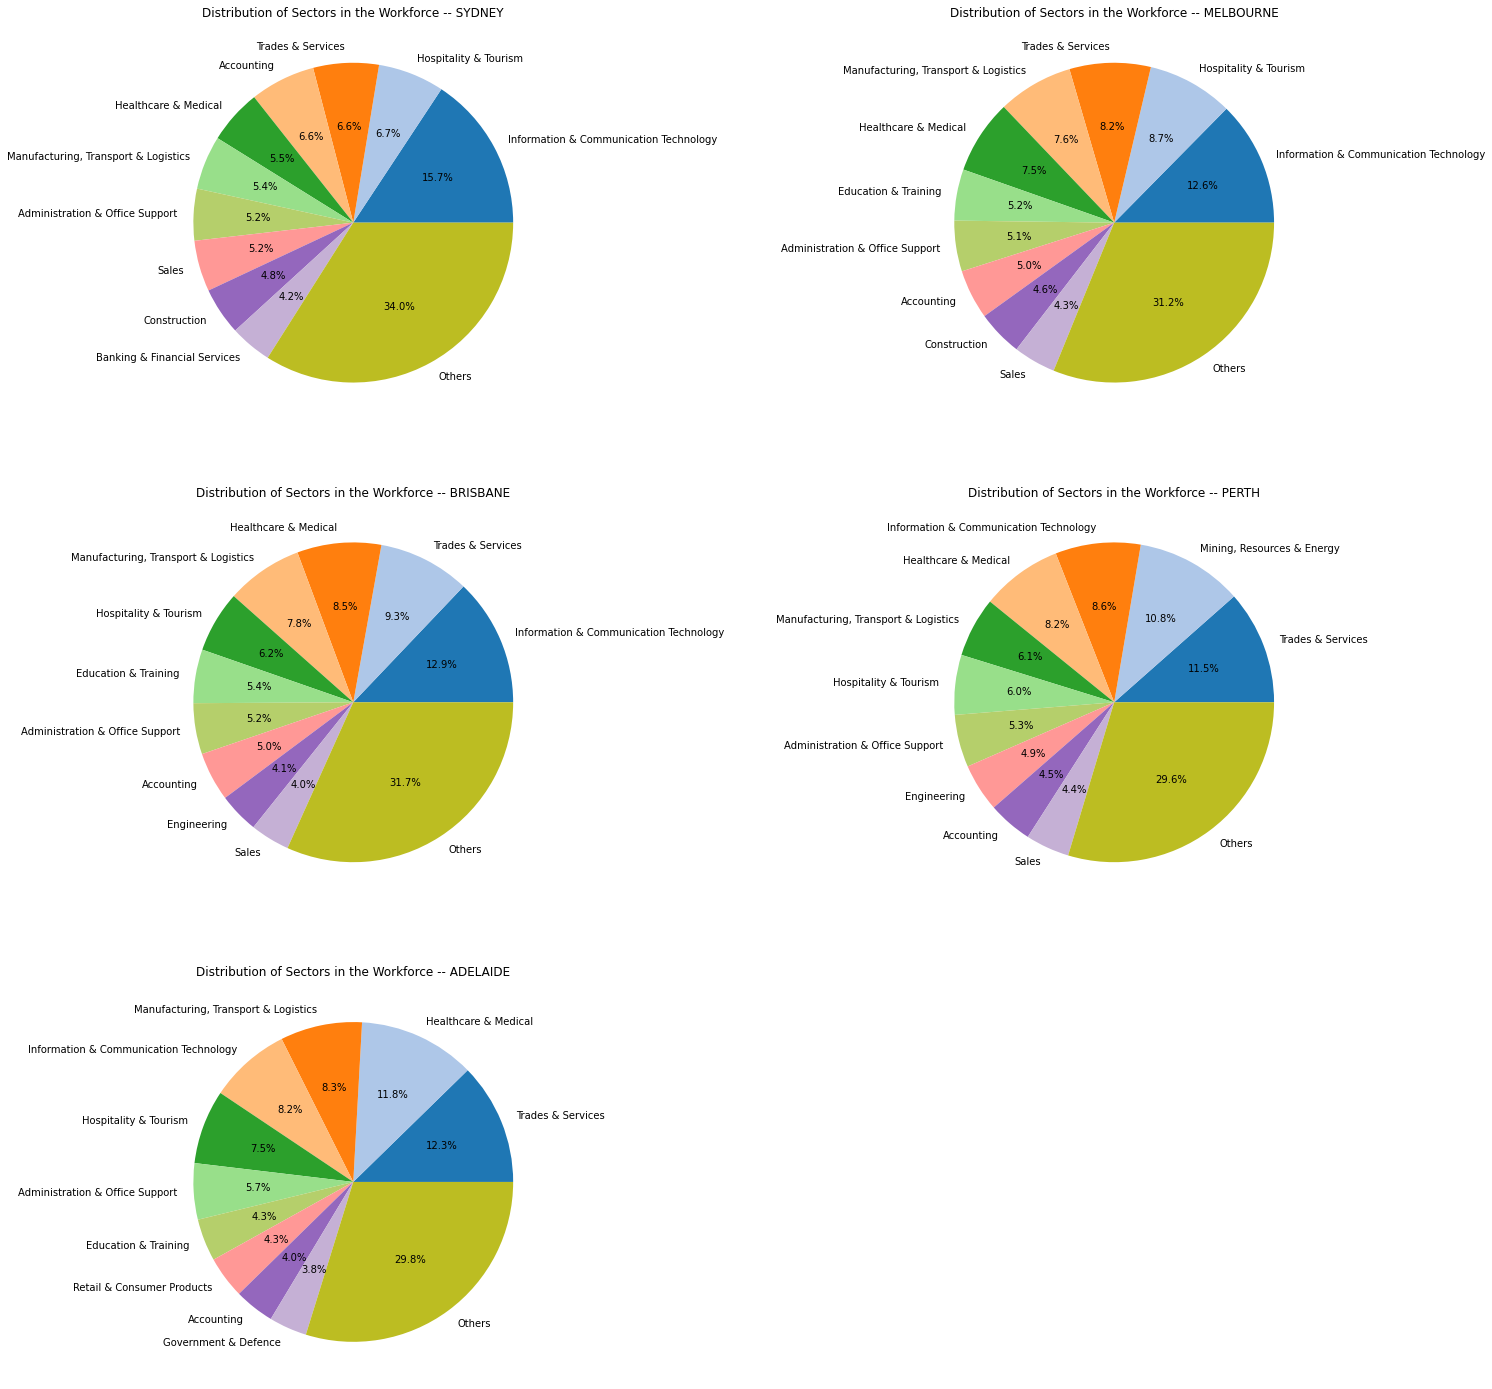

In [60]:
# ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']

fig = plt.figure(figsize=(25,25))

ax1 = plt.subplot2grid((3,2),(0,0))
#----------------------------------

# Market Share Sydney

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

#plt.title("Distribution of Sectors in the Workforce -- SYDNEY")
plt.pie(
    sydeny_market["Value"],
    labels=sydeny_market["Classification"],
    colors=colors,
    autopct= "%.1f%%"#lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*jobTypeDf["Count"].sum())
)

p = plt.gcf()
#p.gca().add_artist(my_circle)
p.gca().set_title('Distribution of Sectors in the Workforce -- SYDNEY')



#----------------------------------
ax1 = plt.subplot2grid((3,2), (0, 1))
#----------------------------------

# Market Share Melbourne 


# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

#plt.title("Distribution of Sectors in the Workforce -- SYDNEY")
plt.pie(
    melbourne_market["Value"],
    labels=melbourne_market["Classification"],
    colors=colors,
    autopct= "%.1f%%"#lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*jobTypeDf["Count"].sum())
)

p = plt.gcf()
#p.gca().add_artist(my_circle)
p.gca().set_title('Distribution of Sectors in the Workforce -- MELBOURNE')


#----------------------------------
ax1 = plt.subplot2grid((3,2), (1, 0))
#----------------------------------

# Market Share Brisbane 

    
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

#plt.title("Distribution of Sectors in the Workforce -- SYDNEY")
plt.pie(
    brisbane_market["Value"],
    labels=brisbane_market["Classification"],
    colors=colors,
    autopct= "%.1f%%"#lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*jobTypeDf["Count"].sum())
)

p = plt.gcf()
#p.gca().add_artist(my_circle)
p.gca().set_title('Distribution of Sectors in the Workforce -- BRISBANE')




#----------------------------------
ax1 = plt.subplot2grid((3,2), (1, 1))
#----------------------------------

# Market Share Perth 

    
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

#plt.title("Distribution of Sectors in the Workforce -- SYDNEY")
plt.pie(
    perth_market["Value"],
    labels=perth_market["Classification"],
    colors=colors,
    autopct= "%.1f%%"#lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*jobTypeDf["Count"].sum())
)

p = plt.gcf()
#p.gca().add_artist(my_circle)
p.gca().set_title('Distribution of Sectors in the Workforce -- PERTH')



# #----------------------------------
ax1 = plt.subplot2grid((3,2),(2,0))
# #----------------------------------

# Market Share Adelaide 
    
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

#plt.title("Distribution of Sectors in the Workforce -- SYDNEY")
plt.pie(
    adelaide_market["Value"],
    labels=adelaide_market["Classification"],
    colors=colors,
    autopct= "%.1f%%"#lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*jobTypeDf["Count"].sum())
)

p = plt.gcf()
#p.gca().add_artist(my_circle)
p.gca().set_title('Distribution of Sectors in the Workforce -- ADELAIDE')



# #----------------------------------